## Анализ и визуализация данных на языке Python

#### Установка:  
```
conda install yfinance --yes
```

In [ ]:
import pandas as pd
import numpy as np
np.set_printoptions(legacy="1.25")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [ ]:
import yfinance as yf

In [ ]:
# Скачиваем данные с Yahoo, используя библиотеку "yahoo finance"
data = yf.download("MSFT AAPL", start="2023-04-25", end="2025-04-26")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.head()

Price            Close                    High                     Low  \
Ticker            AAPL        MSFT        AAPL        MSFT        AAPL   
Date                                                                     
2023-04-25  162.134933  271.108154  164.649568  277.191396  162.095324   
2023-04-26  162.124985  290.745789  163.629813  294.880047  161.174578   
2023-04-27  166.728577  300.057709  166.877073  300.421941  163.540724   
2023-04-28  167.985901  302.449677  168.154217  304.093515  166.203884   
2023-05-01  167.896805  300.776306  168.748219  303.768722  166.956293   

Price                         Open                Volume            
Ticker            MSFT        AAPL        MSFT      AAPL      MSFT  
Date                                                                
2023-04-25  271.058919  163.540754  275.134119  48714100  45772200  
2023-04-26  288.147135  161.431977  292.054983  45498800  64599200  
2023-04-27  290.627702  163.540724  291.336431  64902300  46462600  
2023-04-28  298.561504  166.807795  299.250557  55209200  36446700  
2023-05-01  300.372721  167.589902  302.164236  52472900  21294100

In [ ]:
data.tail()

Price            Close                    High                     Low  \
Ticker            AAPL        MSFT        AAPL        MSFT        AAPL   
Date                                                                     
2025-04-21  193.160004  359.119995  193.800003  364.480011  189.809998   
2025-04-22  199.740005  366.820007  201.589996  367.769989  195.970001   
2025-04-23  204.600006  374.390015  208.000000  380.390015  202.800003   
2025-04-24  208.369995  387.299988  208.830002  388.450012  202.940002   
2025-04-25  209.279999  391.850006  209.750000  392.160004  206.199997   

Price                         Open                Volume            
Ticker            MSFT        AAPL        MSFT      AAPL      MSFT  
Date                                                                
2025-04-21  355.670013  193.270004  362.820007  46742500  20807300  
2025-04-22  359.859985  196.119995  363.380005  52976400  19485000  
2025-04-23  373.019989  206.000000  376.059998  52929200  20545500  
2025-04-24  375.190002  204.889999  375.700012  47311000  22232300  
2025-04-25  384.600006  206.369995  387.000000  38198600  18963600

In [ ]:
data.columns

MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'MSFT'),
            (  'High', 'AAPL'),
            (  'High', 'MSFT'),
            (   'Low', 'AAPL'),
            (   'Low', 'MSFT'),
            (  'Open', 'AAPL'),
            (  'Open', 'MSFT'),
            ('Volume', 'AAPL'),
            ('Volume', 'MSFT')],
           names=['Price', 'Ticker'])

In [ ]:
data[('High','AAPL')].mean()

202.2148014830185

In [ ]:
data[('Close','AAPL')].cov(data[('Close','MSFT')])

724.0183284056268

In [ ]:
data[('Close','AAPL')].corr(data[('Close','MSFT')])

0.6557061723984846

In [ ]:
(
    data[[('Close','MSFT'), ('Close','AAPL')]]
    .to_csv('data/ms_apple_stock.csv', header=['MSFT', 'AAPL'])
)

In [ ]:
data_act = pd.read_csv('data/ms_apple_stock.csv', index_col=0 , parse_dates=[0])
data_act.head()

,MSFT,AAPL
Date,,
2023-04-25,271.108154,162.134933
2023-04-26,290.745789,162.124985
2023-04-27,300.057709,166.728577
2023-04-28,302.449677,167.985901
2023-05-01,300.776306,167.896805


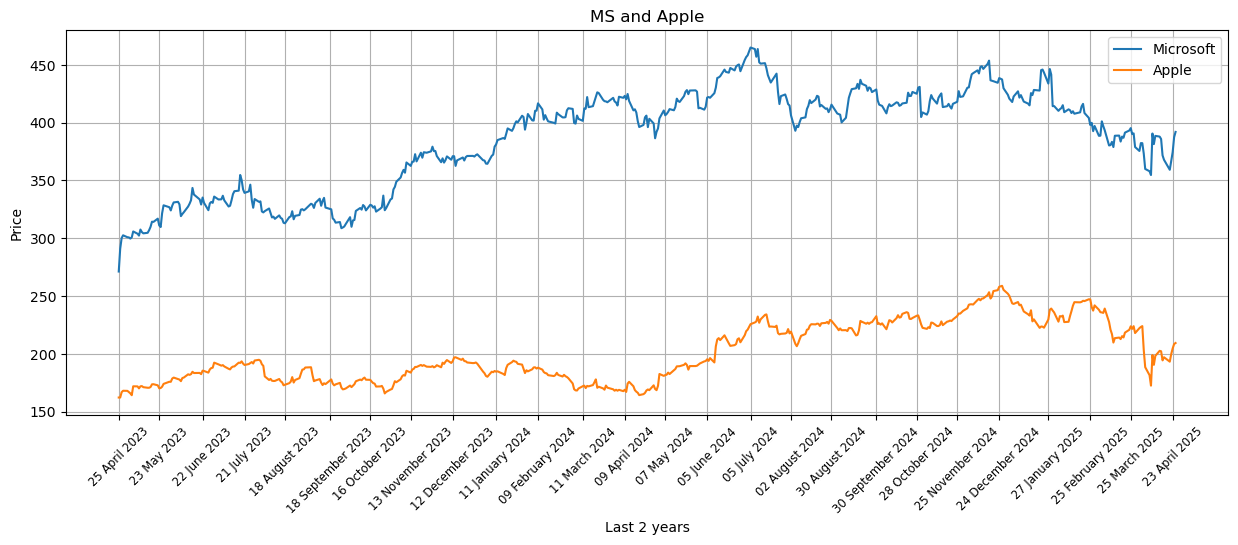

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))

ticks_to_use = data_act.index[::20]
labels = [curr_date.strftime("%d %B %Y") for curr_date in ticks_to_use]
ax.set_xticks(ticks_to_use)

# Названия тиков
ax.set_xticklabels(labels, rotation=45, fontsize='small')
ax.plot(data_act.index, data_act.MSFT, label='Microsoft')
ax.plot(data_act.index, data_act.AAPL, label='Apple')
ax.set_xlabel('Last 2 years')
ax.set_ylabel('Price')
ax.set_title('MS and Apple')
ax.legend(loc="best")
ax.grid();

In [ ]:
df = yf.download("TSLA", start="2023-04-25", end="2025-04-26")  # Tesla

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
count,503.000000,503.000000,503.000000,503.000000,5.030000e+02
mean,245.488509,250.896561,239.843161,245.461153,1.069463e+08
std,66.908598,68.983593,64.848973,67.269169,3.457654e+07
min,142.050003,144.440002,138.800003,140.559998,3.716760e+07
25%,197.455002,200.790001,191.974998,195.909996,8.168305e+07
50%,238.589996,243.619995,232.800003,238.110001,1.037063e+08
75%,262.049988,267.419998,256.035004,260.785004,1.254396e+08
max,479.859985,488.540009,457.510010,475.899994,2.438697e+08


In [ ]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2023-04-25,160.669998,163.470001,158.750000,159.820007,121999300
2023-04-26,153.750000,160.669998,153.139999,160.289993,153364100
2023-04-27,160.190002,160.479996,152.369995,152.639999,127015200
2023-04-28,164.309998,165.000000,157.320007,160.899994,122515800
2023-05-01,161.830002,163.279999,158.830002,163.169998,109015000


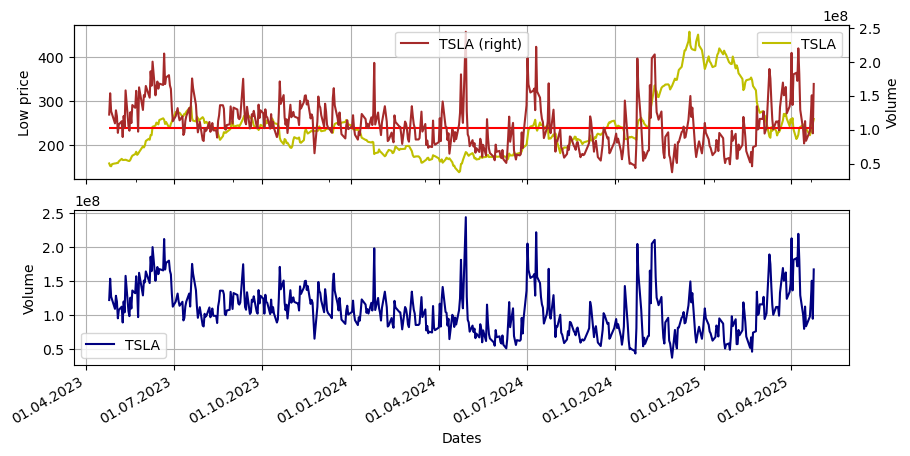

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5))
df.Low.plot(ax=axes[0], color='y')

# дополнительная ось со значениями объема на оси Y справа
mean = df.Low.mean()
axes[0].hlines(y=mean, xmin=df.iloc[0].name, xmax=df.iloc[-1].name, color='r', linestyle='-')
df.Volume.plot(ax=axes[1], sharex=True, color='navy')

ax_add = df.Volume.plot(ax=axes[0], secondary_y=True, color='brown')

axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%Y'))

axes[0].set_ylabel('Low price')
ax_add.set_ylabel('Volume')
axes[1].set_ylabel('Volume')
axes[1].set_xlabel('Dates')

axes[0].grid()
axes[1].grid()

axes[0].legend(loc='best')
ax_add.legend(loc='upper center')
axes[1].legend(loc='best');

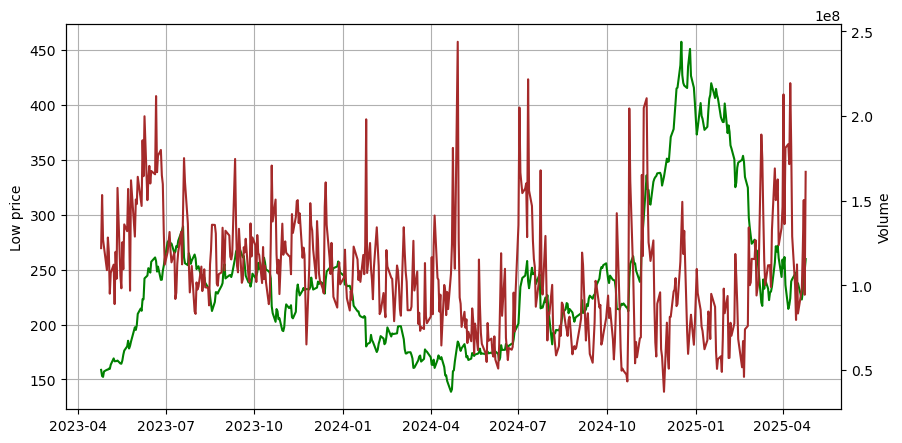

In [ ]:
# более простой способ = это функция twinx()
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(df.index, df.Low, 'green')
ax2 = ax1.twinx()  # Создаю вторую ось
ax2.plot(df.index, df.Volume, 'brown')

ax1.set_ylabel('Low price')
ax2.set_ylabel('Volume')
ax2.set_xlabel('Dates')
ax1.grid()

Пример `moving average`

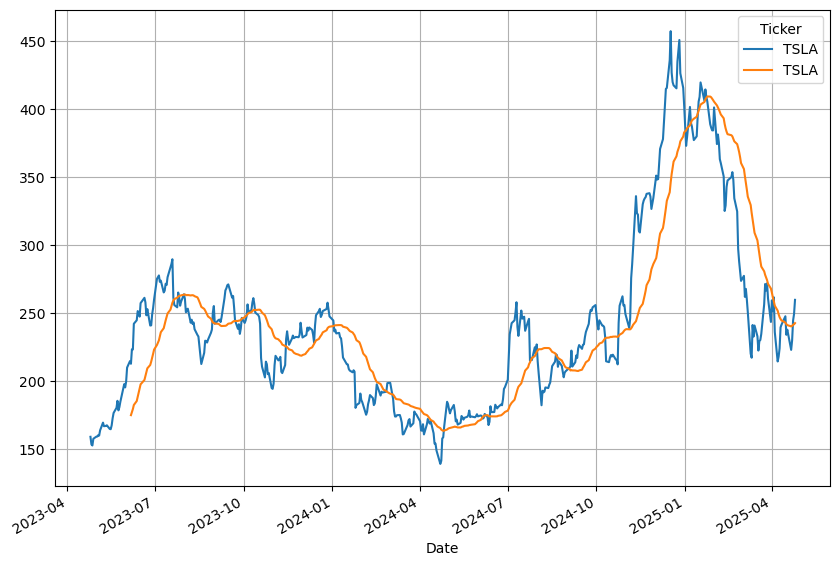

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
df.Low.plot(grid=True, ax=ax)
df.Low.rolling(30).mean().plot(grid=True, ax=ax);